# Car price prediction with Nigeria dataset (Jiji) Usin Machine Learning Algorithms.

## 1. Data Collection 

#### The dataset used in this project was obtained from a popular online marketplace Jiji (https://jiji.ng/cars).
Jiji is a website in Africa that connects consumers and sellers so they can exchange goods and services.
The website was scraped beautifulsoup, and saves as `new_scrape.csv` in CSV format.

## 2. Data Preprocessing 
**Performing data cleaning**

In [1]:
# required libraries and pakages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('../dataset/new_scrape.csv')

In [3]:
# take a look of the data
print("Shape: ", df.shape)
df.head()

Shape:  (5122, 30)


,Name,Price,Market price,Location,Thumbnail,Images,Gear,Odometer,Fuel type,Car condition,...,Engine Size,Number of Cylinders,Horse Power,Color,Seats,Registered Car,Exchange Possible,VIN Chassis number,Mileage,VIN number
0,Toyota Tacoma 2014 White,"₦ 8,800,000",₦ 13.48 M ~ 14.5 M,"Lagos, Ajah",https://pictures-nigeria.jijistatic.com/112155...,https://pictures-nigeria.jijistatic.com/112155...,Automatic,NaN,Petrol,Foreign Used,...,2700 cc,4.0,159 hp,White,NaN,NaN,NaN,NaN,NaN,NaN
1,Lexus GX 460 2010 Gray,"₦ 19,500,000",₦ 17.5 M ~ 18.5 M,"Lagos, Magodo",https://pictures-nigeria.jijistatic.com/113346...,https://pictures-nigeria.jijistatic.com/113346...,Automatic,NaN,Petrol,Foreign Used,...,4600 cc,8.0,305 hp,Gray,7,NaN,NaN,NaN,NaN,NaN
2,Acura MDX 2011 Red,"₦ 7,500,000,",₦ 6.5 M ~ 7.1 M,"Lagos, Apapa",https://pictures-nigeria.jijistatic.com/107470...,https://pictures-nigeria.jijistatic.com/107470...,Automatic,75000 km,Petrol,Foreign Used,...,3700 cc,6.0,300 hp,Red,7,No,NaN,NaN,NaN,NaN
3,Hyundai Elantra Limited 2012 Black,"₦ 4,800,000",₦ 4.8 M ~ 5.24 M,"Lagos, Ojo",https://pictures-nigeria.jijistatic.com/912612...,https://pictures-nigeria.jijistatic.com/912612...,Automatic,NaN,Petrol,Foreign Used,...,1800 cc,4.0,150 hp,Black,5,No,NaN,NaN,NaN,NaN
4,Lexus RX 350 AWD 2013 White,"₦ 13,500,000",₦ 13.5 M ~ 13.9 M,"Lagos, Gbagada",https://pictures-nigeria.jijistatic.com/111479...,https://pictures-nigeria.jijistatic.com/111479...,Automatic,70431 km,Petrol,Foreign Used,...,3500 cc,6.0,270 hp,White,5,NaN,NaN,NaN,NaN,NaN


In [4]:
# rename column name to snake case
df.columns = [column.lower().replace(" ", "_") for column in df.columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5122 entries, 0 to 5121
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 5122 non-null   object 
 1   price                5122 non-null   object 
 2   market_price         4323 non-null   object 
 3   location             5097 non-null   object 
 4   thumbnail            5122 non-null   object 
 5   images               5122 non-null   object 
 6   gear                 5097 non-null   object 
 7   odometer             2499 non-null   object 
 8   fuel_type            2933 non-null   object 
 9   car_condition        5097 non-null   object 
 10  other_features       1543 non-null   object 
 11  dealer_name          5122 non-null   object 
 12  page_link            5122 non-null   object 
 13  second_condition     5094 non-null   object 
 14  make                 5097 non-null   object 
 15  model                5097 non-null   o

In [6]:
df.isnull()

,name,price,market_price,location,thumbnail,images,gear,odometer,fuel_type,car_condition,...,engine_size,number_of_cylinders,horse_power,color,seats,registered_car,exchange_possible,vin_chassis_number,mileage,vin_number
0,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,True,True,True,True,True
1,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5117,False,False,False,False,False,False,False,True,True,False,...,True,True,True,False,True,False,True,True,True,True
5118,False,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,True,True,True,True,True
5119,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
5120,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,True,True


In [7]:
df.isnull().sum()

name                      0
price                     0
market_price            799
location                 25
thumbnail                 0
images                    0
gear                     25
odometer               2623
fuel_type              2189
car_condition            25
other_features         3579
dealer_name               0
page_link                 0
second_condition         28
make                     25
model                    25
year_of_manufacture      25
trim                   1852
body                   2098
drivetrain             2189
engine_size            2226
number_of_cylinders    2049
horse_power            2360
color                    25
seats                  2203
registered_car          930
exchange_possible      3789
vin_chassis_number     4947
mileage                5118
vin_number             5117
dtype: int64

In [8]:
# check the percentage of null values
100 * df.isnull().sum() / len(df)

name                    0.000000
price                   0.000000
market_price           15.599375
location                0.488091
thumbnail               0.000000
images                  0.000000
gear                    0.488091
odometer               51.210465
fuel_type              42.737212
car_condition           0.488091
other_features         69.875049
dealer_name             0.000000
page_link               0.000000
second_condition        0.546661
make                    0.488091
model                   0.488091
year_of_manufacture     0.488091
trim                   36.157751
body                   40.960562
drivetrain             42.737212
engine_size            43.459586
number_of_cylinders    40.003905
horse_power            46.075752
color                   0.488091
seats                  43.010543
registered_car         18.156970
exchange_possible      73.975010
vin_chassis_number     96.583366
mileage                99.921906
vin_number             99.902382
dtype: flo

In [9]:
# let calculate and show the percentage of the missing data
def null_value_percentage(df):
    percent_missing = 100 * df.isnull().sum() / len(df)
    percent_missing = percent_missing[percent_missing > 0].sort_values()
    return percent_missing

In [10]:
null_value_percentage = null_value_percentage(df)
print(null_value_percentage)

location                0.488091
gear                    0.488091
color                   0.488091
car_condition           0.488091
year_of_manufacture     0.488091
make                    0.488091
model                   0.488091
second_condition        0.546661
market_price           15.599375
registered_car         18.156970
trim                   36.157751
number_of_cylinders    40.003905
body                   40.960562
drivetrain             42.737212
fuel_type              42.737212
seats                  43.010543
engine_size            43.459586
horse_power            46.075752
odometer               51.210465
other_features         69.875049
exchange_possible      73.975010
vin_chassis_number     96.583366
vin_number             99.902382
mileage                99.921906
dtype: float64


In [11]:
### The last three features has the highest percentage of missing data

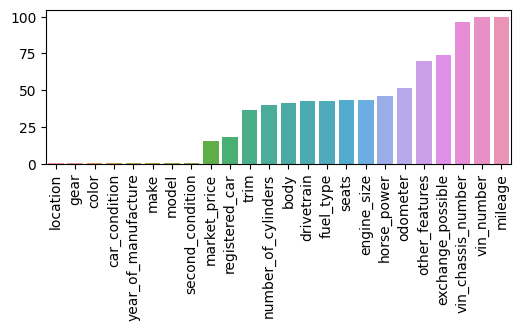

In [12]:
# bar chart
plt.figure(figsize=(6, 2))
sns.barplot(x=null_value_percentage.index, y=null_value_percentage)
plt.xticks(rotation=90);

In [13]:
df2 = df.drop([["vin_chassis_number", "mileage", "vin_number"]], axis=1)

KeyError: "[('vin_chassis_number', 'mileage', 'vin_number')] not found in axis"

In [16]:
df2

,name,price,market_price,location,thumbnail,images,gear,odometer,fuel_type,car_condition,...,drivetrain,engine_size,number_of_cylinders,horse_power,color,seats,registered_car,exchange_possible,mileage,vin_number
0,Toyota Tacoma 2014 White,"₦ 8,800,000",₦ 13.48 M ~ 14.5 M,"Lagos, Ajah",https://pictures-nigeria.jijistatic.com/112155...,https://pictures-nigeria.jijistatic.com/112155...,Automatic,NaN,Petrol,Foreign Used,...,Rear Wheel,2700 cc,4.0,159 hp,White,NaN,NaN,NaN,NaN,NaN
1,Lexus GX 460 2010 Gray,"₦ 19,500,000",₦ 17.5 M ~ 18.5 M,"Lagos, Magodo",https://pictures-nigeria.jijistatic.com/113346...,https://pictures-nigeria.jijistatic.com/113346...,Automatic,NaN,Petrol,Foreign Used,...,All Wheel,4600 cc,8.0,305 hp,Gray,7,NaN,NaN,NaN,NaN
2,Acura MDX 2011 Red,"₦ 7,500,000,",₦ 6.5 M ~ 7.1 M,"Lagos, Apapa",https://pictures-nigeria.jijistatic.com/107470...,https://pictures-nigeria.jijistatic.com/107470...,Automatic,75000 km,Petrol,Foreign Used,...,All Wheel,3700 cc,6.0,300 hp,Red,7,No,NaN,NaN,NaN
3,Hyundai Elantra Limited 2012 Black,"₦ 4,800,000",₦ 4.8 M ~ 5.24 M,"Lagos, Ojo",https://pictures-nigeria.jijistatic.com/912612...,https://pictures-nigeria.jijistatic.com/912612...,Automatic,NaN,Petrol,Foreign Used,...,Front Wheel,1800 cc,4.0,150 hp,Black,5,No,NaN,NaN,NaN
4,Lexus RX 350 AWD 2013 White,"₦ 13,500,000",₦ 13.5 M ~ 13.9 M,"Lagos, Gbagada",https://pictures-nigeria.jijistatic.com/111479...,https://pictures-nigeria.jijistatic.com/111479...,Automatic,70431 km,Petrol,Foreign Used,...,All Wheel,3500 cc,6.0,270 hp,White,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5117,Ford Explorer 2013 Blue,"₦ 4,200,000",₦ 4.7 M ~ 4.8 M,"Lagos, Agege",https://pictures-nigeria.jijistatic.com/111825...,https://pictures-nigeria.jijistatic.com/111825...,Automatic,NaN,NaN,Nigerian Used,...,NaN,NaN,NaN,NaN,Blue,NaN,Yes,NaN,NaN,NaN
5118,Toyota RAV4 2.5 Sport 4x4 2011 Gray,"₦ 4,650,000,",₦ 4.47 M ~ 4.6 M,"Lagos, Ajah",https://pictures-nigeria.jijistatic.com/117342...,https://pictures-nigeria.jijistatic.com/117342...,Automatic,NaN,Petrol,Nigerian Used,...,All Wheel,2500 cc,4.0,NaN,Gray,5,NaN,NaN,NaN,NaN
5119,Lexus GX 460 2010 Black,"₦ 10,200,000",₦ 17.5 M ~ 18.5 M,"Lagos, Ajah",https://pictures-nigeria.jijistatic.com/108385...,https://pictures-nigeria.jijistatic.com/108385...,Automatic,80000 km,Petrol,Foreign Used,...,All Wheel,4600 cc,8.0,305 hp,Black,7,No,NaN,NaN,NaN
5120,Lexus ES 350 FWD 2014 Black,"₦ 12,850,000,",₦ 12.44 M ~ 13.06 M,"Lagos, Ikeja",https://pictures-nigeria.jijistatic.com/116878...,https://pictures-nigeria.jijistatic.com/116878...,Automatic,NaN,Petrol,Foreign Used,...,Front Wheel,3500 cc,6.0,268 hp,Black,5,No,No,NaN,NaN


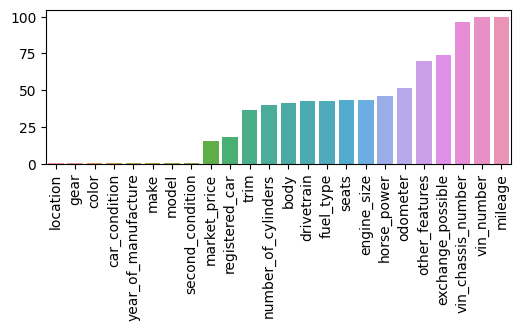

In [15]:
# bar chart
plt.figure(figsize=(6, 2))
sns.barplot(x=null_value_percentage.index, y=null_value_percentage)
plt.xticks(rotation=90);

(0.0, 1.0)

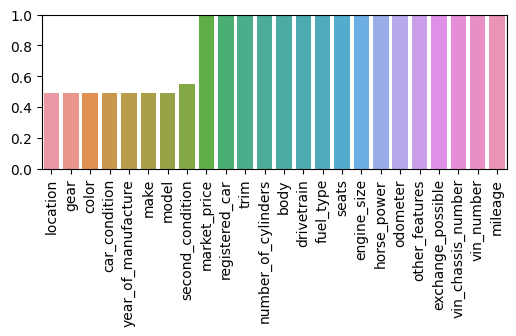

In [80]:
plt.figure(figsize=(6, 2))
sns.barplot(x=null_value_percentage.index, y=null_value_percentage)
plt.xticks(rotation=90);
plt.ylim((0,1))

In [81]:
100 / len(df)

0.01952362358453729

### Since, all the media data and the links are not applicable here, we remove them
*There is no need for the car images, thumbnail and page link. So, let's drop them.*

In [82]:
df = df.drop(["thumbnail", "images", "page_link"], axis=1)

### Cleaning the *price* column to extract the price digit. 

In [83]:
# custom function to clean up the price column
def clean_price(price):
    new_price = ''.join(price.split()[1].split(','))
    return float(new_price)

In [84]:
# plt.figure(figsize=(8, 4))
df['price'] = df['price'].apply(clean_price)

In [85]:
df.columns

Index(['name', 'price', 'market_price', 'location', 'gear', 'odometer',
       'fuel_type', 'car_condition', 'other_features', 'dealer_name',
       'second_condition', 'make', 'model', 'year_of_manufacture', 'trim',
       'body', 'drivetrain', 'engine_size', 'number_of_cylinders',
       'horse_power', 'color', 'seats', 'registered_car', 'exchange_possible',
       'vin_chassis_number', 'mileage', 'vin_number'],
      dtype='object')

In [19]:
location_count = df.groupby('location')['price'].count().sort_values()

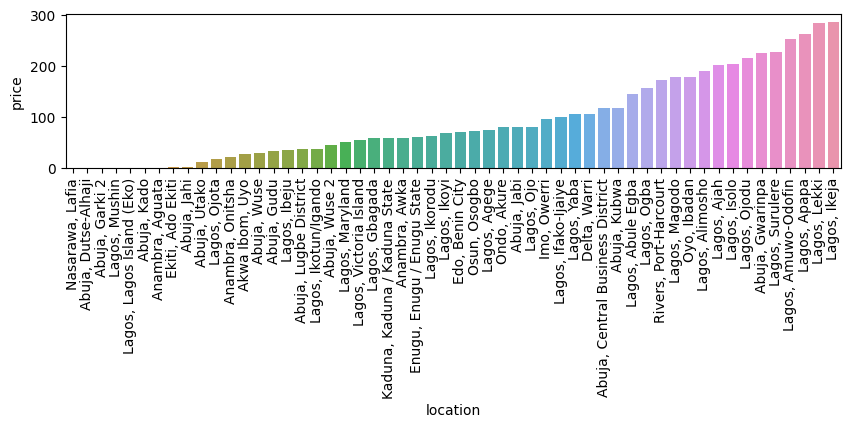

In [20]:
plt.figure(figsize=(10, 2), dpi=100)
sns.barplot(x=location_count.index, y=location_count)
plt.xticks(rotation=90);

In [21]:

# def get_market_price_range(market_price: str) -> tuple:
#     # print("Market Price: ", market_price, type(market_price))

#     if isinstance(market_price, str):
        
#         if "₦" in market_price:
#             market_price = market_price.replace("₦", "").split("~")
            
#         # print(market_price)
            
#         for index, price in enumerate(market_price):
#             price = price.strip()
#             if "K" in price:
#                 price = price.replace("K", "").strip()
#                 market_price[index] = float(price) * 1000
#             elif "M" in price:
#                 price = price.replace("M", "").strip()
#                 market_price[index] = float(price) * 1000000
                
                
#         return market_price

#     return market_price


In [22]:
'₦ 13.48 M ~ 14.5 M'.split("~")[1].strip()[:-1].strip()

'14.5'

In [40]:

def get_market_price_range(market_prices):
    
    lower_market_price = []
    higher_market_price = []
    
    for price in market_prices:
        
        if not isinstance(price, str):
            lower_market_price.append(0.0)
            higher_market_price.append(0.0)
            continue

        lower, higher = price.split("~")  
            
        lower_market_price.append(float(lower.strip()[1:-1].strip()) * 1000000 
                                  if lower.strip().endswith("M") 
                                  else float(lower.strip()[1:-1].strip())* 1000)
        higher_market_price.append(float(higher.strip()[:-1].strip()) * 1000000
                                  if higher.strip().endswith("M") 
                                  else float(higher.strip()[1:-1].strip())* 1000)
        
    return lower_market_price, higher_market_price
      
    

In [41]:
# for i in df["market_price"]:
#     print(i)

In [42]:
# df[["lower_market_price", "lower_market_price"]] = df["market_price"].apply(get_market_price_range)

lower_market_price, higher_market_price = get_market_price_range(df["market_price"])

In [43]:
len(lower_market_price)

5122

In [44]:
len(higher_market_price)

5122

In [45]:
df2 = pd.DataFrame(list(zip(lower_market_price, higher_market_price)), columns =["lower_market_price", "higher_market_price"])

In [46]:
df2

,lower_market_price,higher_market_price
0,13480000.0,14500000.0
1,17500000.0,18500000.0
2,6500000.0,7100000.0
3,4800000.0,5240000.0
4,13500000.0,13900000.0
...,...,...
5117,4700000.0,4800000.0
5118,4470000.0,4600000.0
5119,17500000.0,18500000.0
5120,12440000.0,13060000.0


In [57]:
df3 = pd.concat([df2, df], axis=1)

In [66]:
df3["horse_power"].isna().sum()

2360

In [59]:
# drop market_price column
df4 = df3.drop("market_price", axis=1)

In [60]:
df4

,lower_market_price,higher_market_price,name,price,location,gear,odometer,fuel_type,car_condition,other_features,...,engine_size,number_of_cylinders,horse_power,color,seats,registered_car,exchange_possible,vin_chassis_number,mileage,vin_number
0,13480000.0,14500000.0,Toyota Tacoma 2014 White,8800000.0,"Lagos, Ajah",Automatic,NaN,Petrol,Foreign Used,Traction Control | Cup Holders | Anti-Lock Bra...,...,2700 cc,4.0,159 hp,White,NaN,NaN,NaN,NaN,NaN,NaN
1,17500000.0,18500000.0,Lexus GX 460 2010 Gray,19500000.0,"Lagos, Magodo",Automatic,NaN,Petrol,Foreign Used,Alloy Wheels | AM/FM Radio | CD Player | Air C...,...,4600 cc,8.0,305 hp,Gray,7,NaN,NaN,NaN,NaN,NaN
2,6500000.0,7100000.0,Acura MDX 2011 Red,7500000.0,"Lagos, Apapa",Automatic,75000 km,Petrol,Foreign Used,NaN,...,3700 cc,6.0,300 hp,Red,7,No,NaN,NaN,NaN,NaN
3,4800000.0,5240000.0,Hyundai Elantra Limited 2012 Black,4800000.0,"Lagos, Ojo",Automatic,NaN,Petrol,Foreign Used,NaN,...,1800 cc,4.0,150 hp,Black,5,No,NaN,NaN,NaN,NaN
4,13500000.0,13900000.0,Lexus RX 350 AWD 2013 White,13500000.0,"Lagos, Gbagada",Automatic,70431 km,Petrol,Foreign Used,NaN,...,3500 cc,6.0,270 hp,White,5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5117,4700000.0,4800000.0,Ford Explorer 2013 Blue,4200000.0,"Lagos, Agege",Automatic,NaN,NaN,Nigerian Used,NaN,...,NaN,NaN,NaN,Blue,NaN,Yes,NaN,NaN,NaN,NaN
5118,4470000.0,4600000.0,Toyota RAV4 2.5 Sport 4x4 2011 Gray,4650000.0,"Lagos, Ajah",Automatic,NaN,Petrol,Nigerian Used,NaN,...,2500 cc,4.0,NaN,Gray,5,NaN,NaN,NaN,NaN,NaN
5119,17500000.0,18500000.0,Lexus GX 460 2010 Black,10200000.0,"Lagos, Ajah",Automatic,80000 km,Petrol,Foreign Used,NaN,...,4600 cc,8.0,305 hp,Black,7,No,NaN,NaN,NaN,NaN
5120,12440000.0,13060000.0,Lexus ES 350 FWD 2014 Black,12850000.0,"Lagos, Ikeja",Automatic,NaN,Petrol,Foreign Used,NaN,...,3500 cc,6.0,268 hp,Black,5,No,No,NaN,NaN,NaN


In [33]:
df3.columns

Index(['lower_market_price', 'higher_market_price', 'name', 'price',
       'market_price', 'location', 'gear', 'odometer', 'fuel_type',
       'car_condition', 'other_features', 'dealer_name', 'second_condition',
       'make', 'model', 'year_of_manufacture', 'trim', 'body', 'drivetrain',
       'engine_size', 'number_of_cylinders', 'horse_power', 'color', 'seats',
       'registered_car', 'exchange_possible', 'vin_chassis_number', 'mileage',
       'vin_number'],
      dtype='object')

In [34]:
df3.head()

,lower_market_price,higher_market_price,name,price,market_price,location,gear,odometer,fuel_type,car_condition,...,engine_size,number_of_cylinders,horse_power,color,seats,registered_car,exchange_possible,vin_chassis_number,mileage,vin_number
0,13.48,14.50,Toyota Tacoma 2014 White,8800000.0,₦ 13.48 M ~ 14.5 M,"Lagos, Ajah",Automatic,NaN,Petrol,Foreign Used,...,2700 cc,4.0,159 hp,White,NaN,NaN,NaN,NaN,NaN,NaN
1,17.50,18.50,Lexus GX 460 2010 Gray,19500000.0,₦ 17.5 M ~ 18.5 M,"Lagos, Magodo",Automatic,NaN,Petrol,Foreign Used,...,4600 cc,8.0,305 hp,Gray,7,NaN,NaN,NaN,NaN,NaN
2,6.50,7.10,Acura MDX 2011 Red,7500000.0,₦ 6.5 M ~ 7.1 M,"Lagos, Apapa",Automatic,75000 km,Petrol,Foreign Used,...,3700 cc,6.0,300 hp,Red,7,No,NaN,NaN,NaN,NaN
3,4.80,5.24,Hyundai Elantra Limited 2012 Black,4800000.0,₦ 4.8 M ~ 5.24 M,"Lagos, Ojo",Automatic,NaN,Petrol,Foreign Used,...,1800 cc,4.0,150 hp,Black,5,No,NaN,NaN,NaN,NaN
4,13.50,13.90,Lexus RX 350 AWD 2013 White,13500000.0,₦ 13.5 M ~ 13.9 M,"Lagos, Gbagada",Automatic,70431 km,Petrol,Foreign Used,...,3500 cc,6.0,270 hp,White,5,NaN,NaN,NaN,NaN,NaN


In [ ]:
# print("Lower price: ", lower_market_price, type(lower_market_price))
# print("Higher price: ", higher_market_price, type(higher_market_price))